# A Cando Demo
# Explore hydrolysis catalyst design

## Click on this text box and then hit Shift-Enter to evaluate each cell and recreate the calculations set up within this notebook.  

## Some cells take a few seconds to evaluate - wait until output appears before moving on to the next cell.

## The Chemdraw structure for a designed molecule that might present six carboxylic acids to bind and wrap around a Zr-O cluster that could hydrloyze nerve agents.

## It turns out that this is a poor design - but suggests some ideas on how to make a better one.

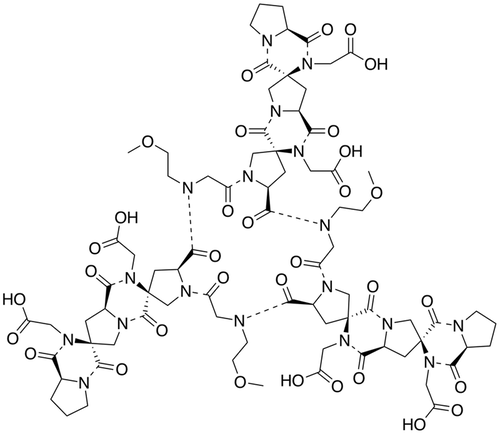

In [2]:
(png-from-file "trimer.png")

## The following is a Zr-O cluster - the hydrolytic heart of NU-1000 (Farha group)

In [3]:
(defparameter *zr* (load-mol2 "renamed-zrcluster.mol2"))

*ZR*

In [4]:
(:= *zr-view* (nglv:show-aggregate *zr*)) *zr-view*

A Jupyter Widget

### Rotate the molecule by dragging the left mouse button (or trackpad) within the view above.

### Zoom (two button drag scroll or scroll wheel).

### Pick atoms (hover over atom and left button click).

### At the bottom right corner of the view above is a very small control, drag that to make the view larger.

### Double click with left button to go full screen, hit Escape to return to browser.

## Load and build 3D coordinates of trimer

In [5]:
(defparameter *agg* (load-chemdraw-aggregate "trimer.cdxml"))

*AGG*

In [6]:
(build-hydrogens *agg*)

NIL

In [7]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [8]:
(:= *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

In [9]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

In [10]:
(jostle *agg* 20)

NIL

In [11]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

In [12]:
(energy:setup-amber)

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD >

#### You can ignore the warnings above.

In [13]:
(energy:minimize *agg* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          13648.437
 minSDnP       0     2  0.000276   0.0       14246406.467           8078.629
 minSDnP       0     3  0.000197   0.0       11043815.612           6091.851
 minSDnP       0     4  0.000159   0.0        9337628.822           5057.899
DONE absolute force test:
forceRmsMag(3492.548507).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     5  0.000000   0.0              0.000           3492.549
 minCGnP       0     6  0.000303  46.8        7529769.395           3724.330
 minCGnP       0     7  0.000166  49.3        6955928.469           4011.187
 minCGnP       0     8  0.000180  49.6        6299015.917           3538.993
 minCGnP       0     9  0.000162  44.7        5690756.819           2863.548
 minCGnP       0    10  0.000196  49.6        5198948.391 

NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [14]:
(calculate-all-stereochemistry *stereocenters*)

Center: #<ATOM :C_108/:C>  config: S
Center: #<ATOM :C_110/:C>  config: S
Center: #<ATOM :C_133/:C>  config: S
Center: #<ATOM :C_135/:C>  config: S
Center: #<ATOM :C_158/:C>  config: S
Center: #<ATOM :C_227/:C>  config: S
Center: #<ATOM :C_229/:C>  config: S
Center: #<ATOM :C_237/:C>  config: S
Center: #<ATOM :C_239/:C>  config: S
Center: #<ATOM :C_247/:C>  config: S
Center: #<ATOM :C_322/:C>  config: S
Center: #<ATOM :C_324/:C>  config: S
Center: #<ATOM :C_332/:C>  config: S
Center: #<ATOM :C_334/:C>  config: S
Center: #<ATOM :C_342/:C>  config: S


NIL

In [15]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

## Above should be a chemically reasonable three-dimensional structure of the molecule.

In [16]:
(center-on *agg* '(0.0 0.0 15.0))

NIL

In [17]:
(:= *design-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::add-structure *design-view* *cagg*)
*design-view*

A Jupyter Widget

## You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.

In [18]:
(:= *named-map* (named-atom-map *design-view* 6 *agg* *zr*))

SIMPLE-ERROR: 
There aren't enough atoms selected to create a map for 6 pairs.


NIL

#### If you didn't select atoms in the view above then you will have just seen an error - don't worry about it. 
#### I set the *named-map* variable below using a selection I made previously.

In [19]:
(:= *named-map* '((:C_350 . :C_2) (:C_354 . :C_1) 
                  (:C_255 . :C_7) (:C_259 . :C_8)
                  (:C_185 . :C_3) (:C_196 . :C_4)))

*NAMED-MAP*

In [20]:
(cartoon-atom-map *design-view* *named-map* *agg* *zr*)

NIL

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [21]:
(clear-all-atom-restraints *agg*)

NIL

In [22]:
(anchor-named-atom-map *named-map* *agg* *zr*)

NIL

In [23]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

In [24]:
(energy:minimize *agg* :force-field energy::*ff* :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(29.565612).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000             29.566
 minCGnP       0     2  0.000728  45.2          14830.270             29.742
 minCGnP       0     3  0.001060  45.1          14460.395             28.240
 minCGnP       0     4  0.000816  51.5          14243.529             25.605
 minCGnP       0     5  0.001271  62.4          13971.461             30.779
 minCGnP       0     6  0.001182  69.5          13593.641             38.658
 minCGnP       0     7  0.000957  71.6          13038.447             51.179
 minCGnP       0     8  0.000478  63.7          12727.255             44.000
 minCGnP       0     9  0.000810  59.0          12186.312             38.898
 minCGnP       0    10  0.000894  57.2          11747.720   

NIL

In [25]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### It turns out that the structure above is a bad design - with lots of bad geometry.
# We can rule this design out and move on to another design with a larger macrocycle to better envelop the Zr-O cluster.

### Overlay of the trial above on the Zr-O cluster and looking at it closely can help us learn what is wrong with the design.

In [26]:
(:= *overlay-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::clear-representations *overlay-view*)
(nglv::add-representation *overlay-view* "hyperball")
(nglv::add-structure *overlay-view* *cagg*)
*overlay-view*

A Jupyter Widget

## That's it for now - anything more sophisticated requires setting up more designs and running more sophisticated calculations on super-computers.
## This user interface can drive 100,000s of copies of Cando running on large super-computers.